# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.head()



,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
df_data.shape

(4324, 9)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [10]:
df_data.duplicated().values.any()

np.False_

In [11]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [12]:
df_data.isna().values.any()

np.True_

## Descriptive Statistics

In [13]:
df_data['Price'].describe()


,Price
count,964
unique,56
top,450.0
freq,136


In [14]:

df_data['Mission_Status'].value_counts()


,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [15]:
df_data['Location'].value_counts()

,count
Location,
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
"Site 132/1, Plesetsk Cosmodrome, Russia",216
"Site 43/4, Plesetsk Cosmodrome, Russia",202
"Site 41/1, Plesetsk Cosmodrome, Russia",198
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",193
...,...
"Santa Rita 2, San Marco Launch Platform, Kenya",1
"LC-576A1, Vandenberg AFB, California, USA",1
"Site 250, Baikonur Cosmodrome, Kazakhstan",1


In [16]:
df_data['Organisation'].value_counts()

,count
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [17]:
# 会社ごとの打ち上げ回数
launches_per_company = df_data['Organisation'].value_counts().reset_index()
launches_per_company.columns = ['Company', 'Number of Launches']

launches_per_company.head(10)



,Company,Number of Launches
0,RVSN USSR,1777
1,Arianespace,279
2,General Dynamics,251
3,CASC,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


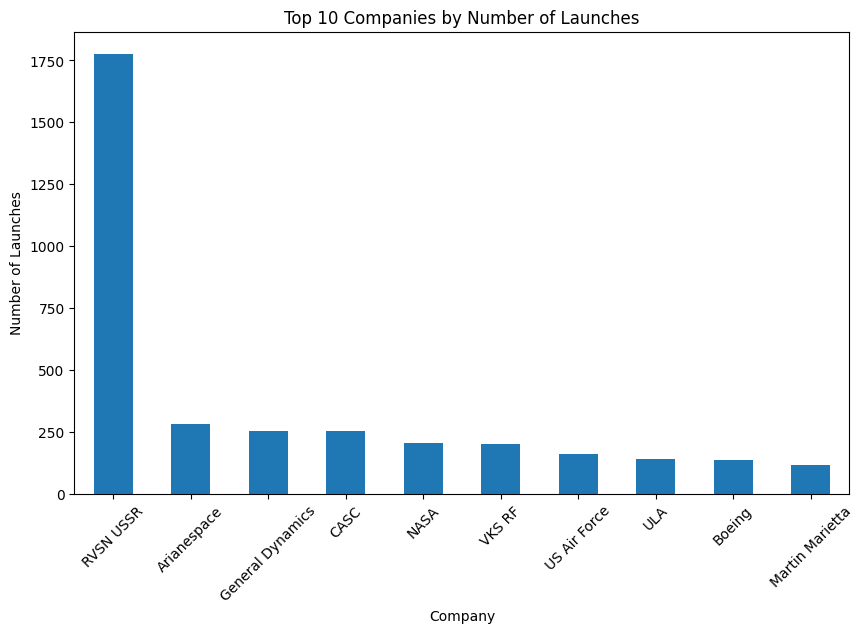

In [18]:
import matplotlib.pyplot as plt

top_companies = df_data['Organisation'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_companies.plot(kind='bar')
plt.title("Top 10 Companies by Number of Launches")
plt.xlabel("Company")
plt.ylabel("Number of Launches")
plt.xticks(rotation=45)
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [19]:
df_data['Rocket_Status'].value_counts()


,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


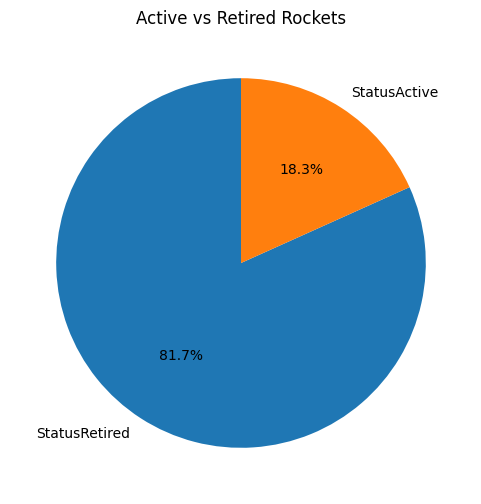

In [20]:
status_counts = df_data['Rocket_Status'].value_counts().reset_index()
status_counts.columns = ['Rocket_Status', 'Count']
status_counts
import matplotlib.pyplot as plt

status_counts = df_data['Rocket_Status'].value_counts()

plt.figure(figsize=(6,6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Active vs Retired Rockets")
plt.show()


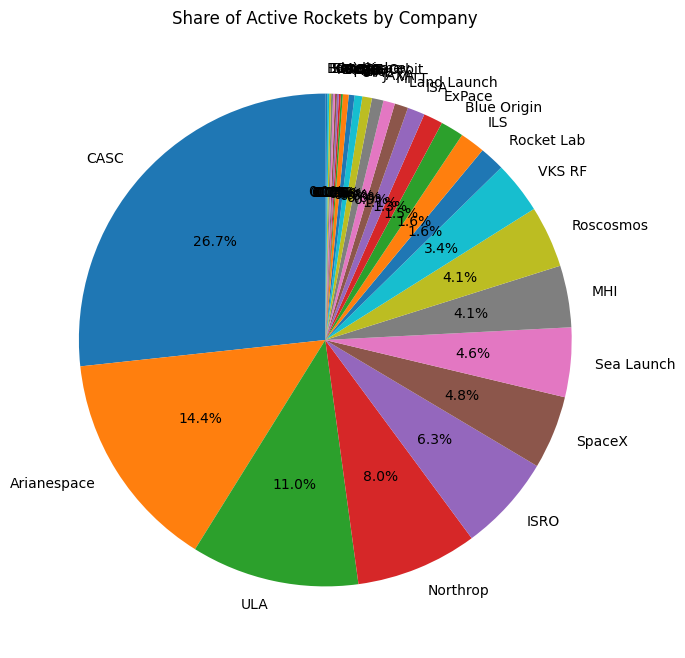

In [21]:
import matplotlib.pyplot as plt

# Active だけを抽出
active_counts = df_data[df_data['Rocket_Status'] == 'StatusActive']['Organisation'].value_counts()

# 円グラフ
plt.figure(figsize=(8,8))
active_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Share of Active Rockets by Company")
plt.show()


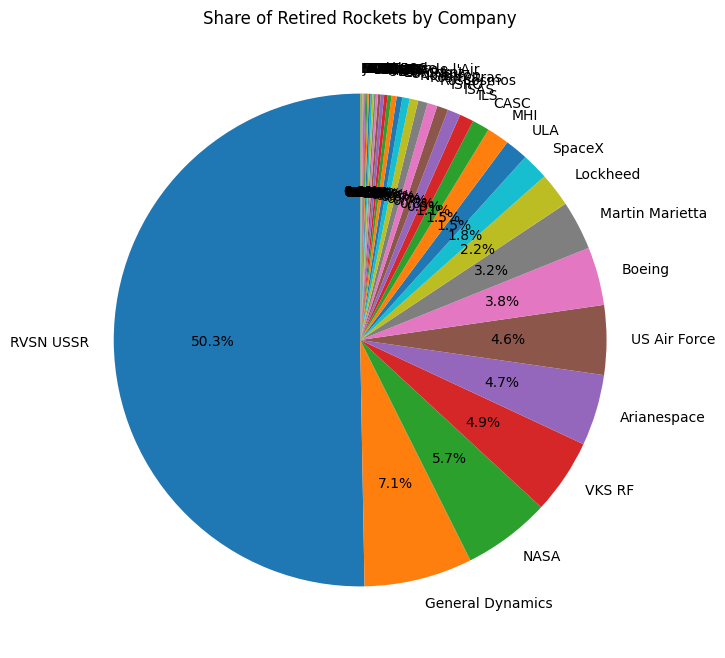

In [22]:
import matplotlib.pyplot as plt


active_counts = df_data[df_data['Rocket_Status'] == 'StatusRetired']['Organisation'].value_counts()

plt.figure(figsize=(8,8))
active_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.title("Share of Retired Rockets by Company")
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [23]:
df_data['Mission_Status'].value_counts()


,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [24]:
mission_status_counts = df_data['Mission_Status'].value_counts().reset_index()
mission_status_counts.columns = ['Mission_Status', 'Count']
mission_status_counts


,Mission_Status,Count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


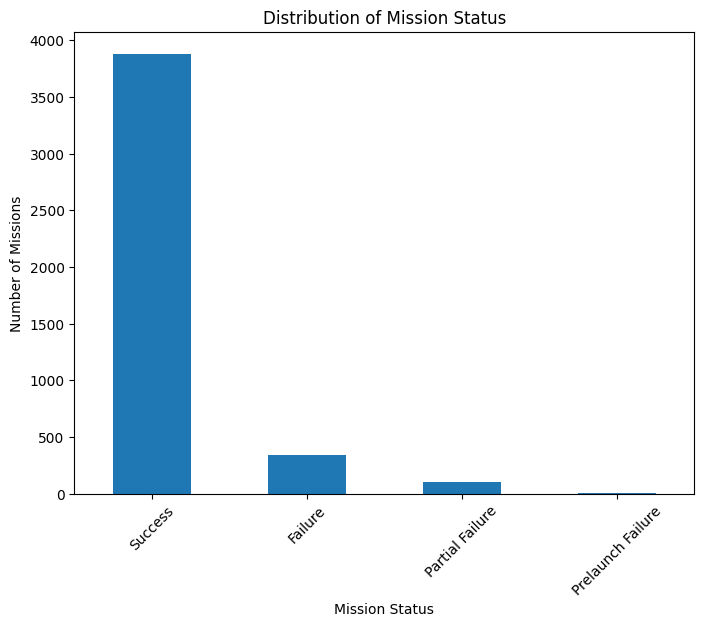

In [25]:
import matplotlib.pyplot as plt

status_counts = df_data['Mission_Status'].value_counts()

plt.figure(figsize=(8,6))
status_counts.plot(kind='bar')
plt.title("Distribution of Mission Status")
plt.xlabel("Mission Status")
plt.ylabel("Number of Missions")
plt.xticks(rotation=45)
plt.show()


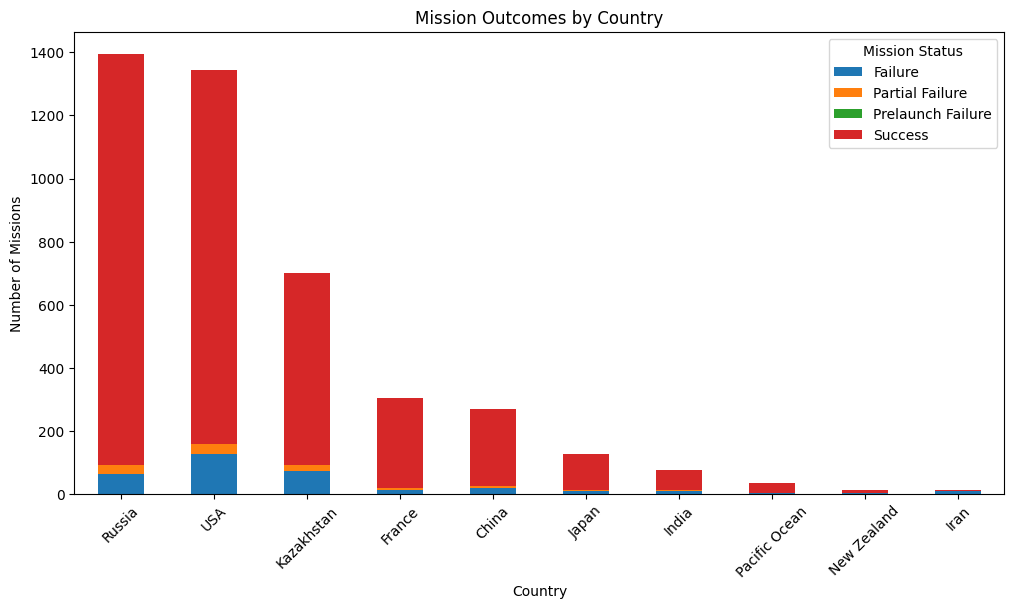

In [26]:
import matplotlib.pyplot as plt

# 国 × 成否のクロス集計
status_by_country = pd.crosstab(df_data['Location'].str.split(',').str[-1].str.strip(),
                                df_data['Mission_Status'])

# 上位の国だけに絞る（必要なら）
top_countries = status_by_country.sum(axis=1).sort_values(ascending=False).head(10)
status_by_country_top = status_by_country.loc[top_countries.index]

# 積み上げ棒グラフ
status_by_country_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Mission Outcomes by Country")
plt.xlabel("Country")
plt.ylabel("Number of Missions")
plt.xticks(rotation=45)
plt.legend(title="Mission Status")
plt.show()


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

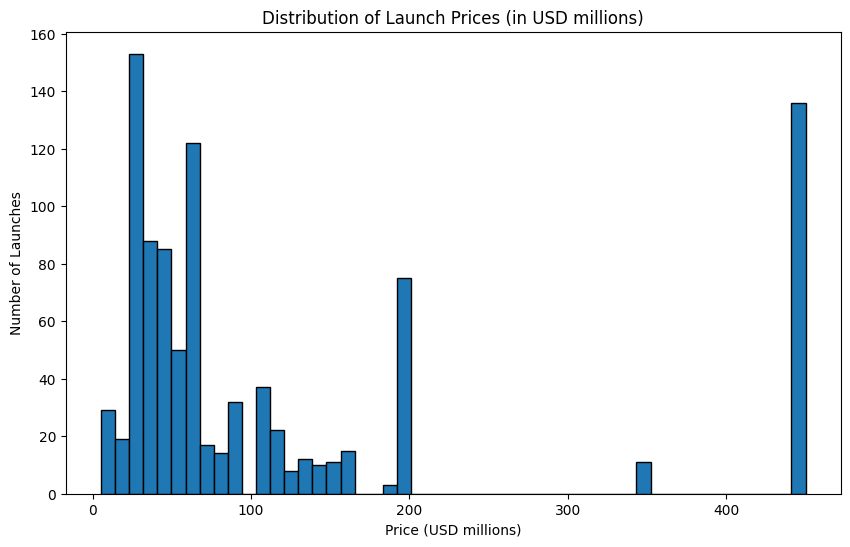

In [27]:
import matplotlib.pyplot as plt

# Price列を数値に変換（念のためエラーはNaNに）
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# 欠損を除いたデータ
prices = df_data['Price'].dropna()

plt.figure(figsize=(10,6))
plt.hist(prices, bins=50, edgecolor='black')
plt.title("Distribution of Launch Prices (in USD millions)")
plt.xlabel("Price (USD millions)")
plt.ylabel("Number of Launches")
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [31]:
# --- 1) 準備 ---
import re
import pandas as pd

# df_data が未定義なら読み込み（あなたの環境では既にあるはず）
try:
    df_data
except NameError:
    df_data = pd.read_csv("/mnt/data/mission_launches.csv")

# --- 2) 国名の抽出 ---
# Location の末尾（最後のカンマ区切り）を国名とみなす
df = df_data.copy()
df["Country_raw"] = df["Location"].str.split(",").str[-1].str.strip()

# --- 3) 例外ルールの正規化（課題指示どおり） ---
# Russia → Russian Federation など、地名→国名の置換
replacements = {
    # 明示指定
    "Russia": "Russian Federation",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",         # 指示に従う（通常はSpainだが今回はUSAに）
    "New Mexico": "USA",
    # 末尾にUSAが含まれるケースの保険（例：Florida, USA）
    "United States": "USA",
    "U.S.A.": "USA",
    "US": "USA",
    "U.S.": "USA",
}
# 完全一致で置換
df["Country_norm"] = df["Country_raw"].replace(replacements)

# さらに、カンマを含む等の取りこぼしを軽く正規化（空白・大小など）
df["Country_norm"] = df["Country_norm"].str.strip()

# --- 4) ISO Alpha-3 への変換（iso3166を優先、無ければ簡易辞書でフォールバック） ---
# できれば iso3166 を使う（課題要件）
try:
    from iso3166 import countries_by_name, countries

    def to_alpha3(name: str) -> str:
        if pd.isna(name) or not str(name).strip():
            return None
        n = name.strip()
        # まずは素直にヒットを狙う
        key = n.upper()
        # いくつか一般的な別名の吸収（念のため）
        alias = {
            "RUSSIA": "RUSSIAN FEDERATION",
            "IRAN": "IRAN, ISLAMIC REPUBLIC OF",
            "BOLIVIA": "BOLIVIA (PLURINATIONAL STATE OF)",
            "VENEZUELA": "VENEZUELA, BOLIVARIAN REPUBLIC OF",
            "SYRIA": "SYRIAN ARAB REPUBLIC",
            "NORTH KOREA": "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
            "SOUTH KOREA": "KOREA, REPUBLIC OF",
            "MOLDOVA": "MOLDOVA, REPUBLIC OF",
            "TANZANIA": "TANZANIA, UNITED REPUBLIC OF",
            "LAOS": "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
            "PALESTINE": "PALESTINE, STATE OF",
            "BONAIRE": "BONAIRE, SINT EUSTATIUS AND SABA",
            "MACAU": "MACAO",
            "CAPE VERDE": "CABO VERDE",
            "CZECHIA": "CZECH REPUBLIC",
            "USA": "UNITED STATES OF AMERICA",
            "UK": "UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND",
        }
        if key in alias:
            key = alias[key]
        # countries_by_name は大文字キー
        if key in countries_by_name:
            return countries_by_name[key].alpha3
        # 直接 alpha2/alpha3 名称で入ってきた場合の救済
        try:
            c = countries.get(n)
            return c.alpha3
        except Exception:
            return None

except Exception:
    # iso3166なし：最低限のマッピング辞書（必要に応じて追加）
    fallback_alpha3 = {
        "USA": "USA",
        "United States": "USA",
        "Russian Federation": "RUS",
        "Russia": "RUS",
        "China": "CHN",
        "Iran": "IRN",
        "Kazakhstan": "KAZ",
        "Japan": "JPN",
        "India": "IND",
        "France": "FRA",
        "French Guiana": "GUF",  # 実務ではFRA扱いにすることもある
        "New Zealand": "NZL",
        "Australia": "AUS",
        "Brazil": "BRA",
        "Canada": "CAN",
        "South Korea": "KOR",
        "North Korea": "PRK",
        "United Kingdom": "GBR",
        "Italy": "ITA",
        "Spain": "ESP",
        "Germany": "DEU",
        "Israel": "ISR",
        "Mexico": "MEX",
        "Argentina": "ARG",
        "Norway": "NOR",
        "Sweden": "SWE",
        "Netherlands": "NLD",
        "Belgium": "BEL",
        "Luxembourg": "LUX",
        "United Arab Emirates": "ARE",
        "Saudi Arabia": "SAU",
        "Turkey": "TUR",
        "Ukraine": "UKR",
        "Belarus": "BLR",
        "Azerbaijan": "AZE",
        "Vietnam": "VNM",
        "Indonesia": "IDN",
        "Thailand": "THA",
        "Iran, Islamic Republic of": "IRN",
        "Korea, Republic of": "KOR",
        "Korea, Democratic People's Republic of": "PRK",
        "Czechia": "CZE",
    }
    def to_alpha3(name: str) -> str:
        if pd.isna(name) or not str(name).strip():
            return None
        return fallback_alpha3.get(name.strip(), None)

df["iso_alpha3"] = df["Country_norm"].apply(to_alpha3)

# 変換できなかった国を確認（必要に応じて手当て）
unmapped = df.loc[df["iso_alpha3"].isna(), ["Country_raw", "Country_norm"]].drop_duplicates()
# print(unmapped)  # 必要ならチェック

# --- 5) 国別カウント ---
counts = (
    df.dropna(subset=["iso_alpha3"])
      .groupby("iso_alpha3")
      .size()
      .reset_index(name="launches")
      .sort_values("launches", ascending=False)
)

# --- 6) Plotly Choropleth ---
import plotly.express as px

fig = px.choropleth(
    counts,
    locations="iso_alpha3",             # ISO-3 コード
    color="launches",
    locationmode="ISO-3",
    color_continuous_scale=px.colors.sequential.Viridis[::-1],
    title="Number of Launches by Country",
)
fig.update_layout(
    coloraxis_colorbar=dict(title="Launches"),
    margin=dict(l=0, r=0, t=60, b=0),
)
fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
import plotly.express as px

# 失敗だけを抽出
failures = df[df["Mission_Status"] == "Failure"]

# 国別に失敗数を集計
fail_counts = (
    failures.dropna(subset=["iso_alpha3"])
            .groupby("iso_alpha3")
            .size()
            .reset_index(name="failures")
            .sort_values("failures", ascending=False)
)

# コロプレス描画
fig = px.choropleth(
    fail_counts,
    locations="iso_alpha3",
    color="failures",
    locationmode="ISO-3",
    color_continuous_scale=px.colors.sequential.Reds,  # 濃い赤ほど失敗が多い
    title="Number of Failed Launches by Country",
)
fig.update_layout(
    coloraxis_colorbar=dict(title="Failures"),
    margin=dict(l=0, r=0, t=60, b=0),
)
fig.show()


In [35]:
import plotly.express as px

# 国ごとの総打ち上げ数
total_counts = (
    df.dropna(subset=["iso_alpha3"])
      .groupby("iso_alpha3")
      .size()
      .reset_index(name="total")
)

# 国ごとの失敗数
fail_counts = (
    df[df["Mission_Status"] == "Failure"]
      .dropna(subset=["iso_alpha3"])
      .groupby("iso_alpha3")
      .size()
      .reset_index(name="failures")
)

# マージして割合計算
country_stats = total_counts.merge(fail_counts, on="iso_alpha3", how="left").fillna(0)
country_stats["failure_rate"] = country_stats["failures"] / country_stats["total"]

# Choroplethで割合を可視化
fig = px.choropleth(
    country_stats,
    locations="iso_alpha3",
    color="failure_rate",
    locationmode="ISO-3",
    color_continuous_scale=px.colors.sequential.OrRd,  # 濃い赤＝失敗率高い
    title="Failure Rate of Launches by Country",
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Failure Rate",
        tickformat=".0%"   # パーセント表示
    ),
    margin=dict(l=0, r=0, t=60, b=0),
)
fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [36]:
import pandas as pd
import plotly.express as px

# --- 0) データ ---
try:
    df_data
except NameError:
    df_data = pd.read_csv("/mnt/data/mission_launches.csv")

df = df_data.copy()

# --- 1) 国名抽出（Location の末尾を国名とみなす） ---
df["Country_raw"] = df["Location"].str.split(",").str[-1].str.strip()

# --- 2) 課題指定の国名正規化（必要な置換） ---
replacements = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    # よくある表記ゆれ
    "United States": "USA",
    "U.S.A.": "USA",
    "US": "USA",
    "U.S.": "USA",
}
df["Country"] = df["Country_raw"].replace(replacements).str.strip()

# --- 3) NaN や空、組織・ステータスの欠損を除外 ---
df = df.dropna(subset=["Country", "Organisation", "Mission_Status"])
df = df[(df["Country"] != "") & (df["Organisation"] != "") & (df["Mission_Status"] != "")]

# --- 4) 集計（各組み合わせの件数） ---
sunburst_df = (
    df.groupby(["Country", "Organisation", "Mission_Status"])
      .size()
      .reset_index(name="Count")
)

# --- 5) カラー設定（任意：見やすい色を指定） ---
color_map = {
    "Success": "#2ca02c",          # 緑
    "Failure": "#d62728",          # 赤
    "Partial Failure": "#ff7f0e",  # オレンジ
    "Prelaunch Failure": "#7f7f7f",# グレー
}
# Mission_Status 以外のレベルは自動配色に任せる

# --- 6) サンバースト描画 ---
fig = px.sunburst(
    sunburst_df,
    path=["Country", "Organisation", "Mission_Status"],  # 階層
    values="Count",
    color="Mission_Status",
    color_discrete_map=color_map,
    maxdepth=-1,  # 全階層表示
    title="Countries → Organisations → Mission Status (Sunburst)"
)
# 中央に合計件数、ホバー情報を見やすく
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>Count: %{value}<extra></extra>"
)
fig.update_layout(margin=dict(l=0, r=0, t=60, b=0))
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

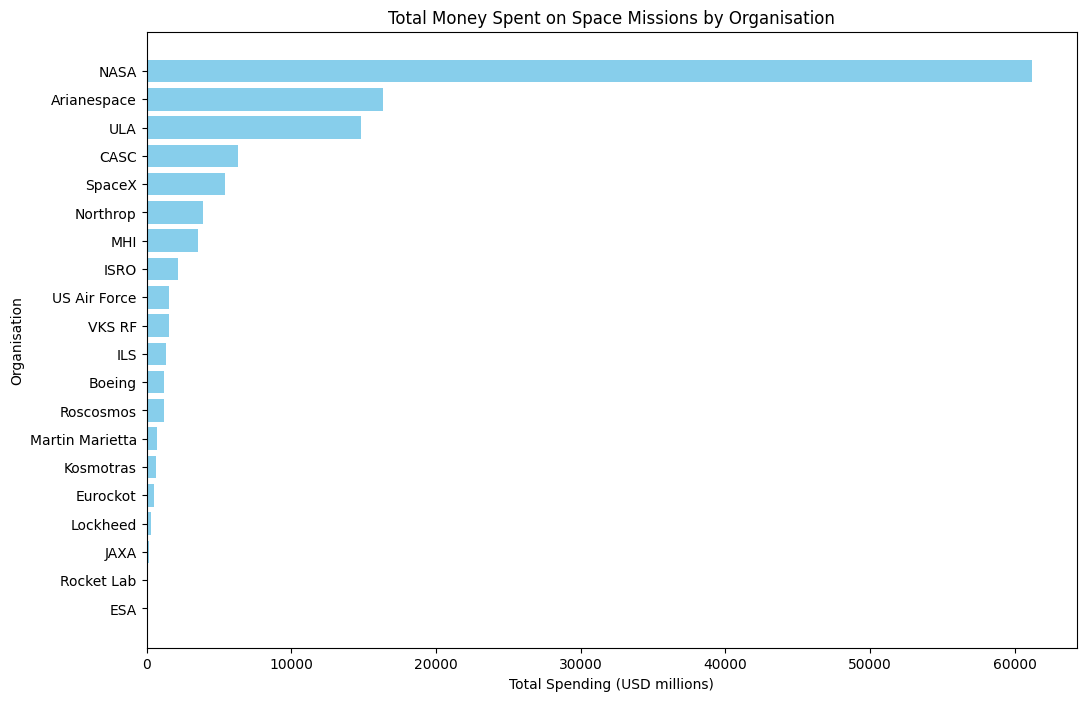

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Price列を数値に変換（百万ドル単位）
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# 組織ごとの合計金額（NaNは無視）
org_spending = (
    df.groupby("Organisation")["Price"]
      .sum()
      .reset_index()
      .sort_values("Price", ascending=False)
)

# 上位20組織を可視化
top_orgs = org_spending.head(20)

plt.figure(figsize=(12,8))
plt.barh(top_orgs["Organisation"], top_orgs["Price"], color="skyblue")
plt.xlabel("Total Spending (USD millions)")
plt.ylabel("Organisation")
plt.title("Total Money Spent on Space Missions by Organisation")
plt.gca().invert_yaxis()  # 上位を上に表示
plt.show()


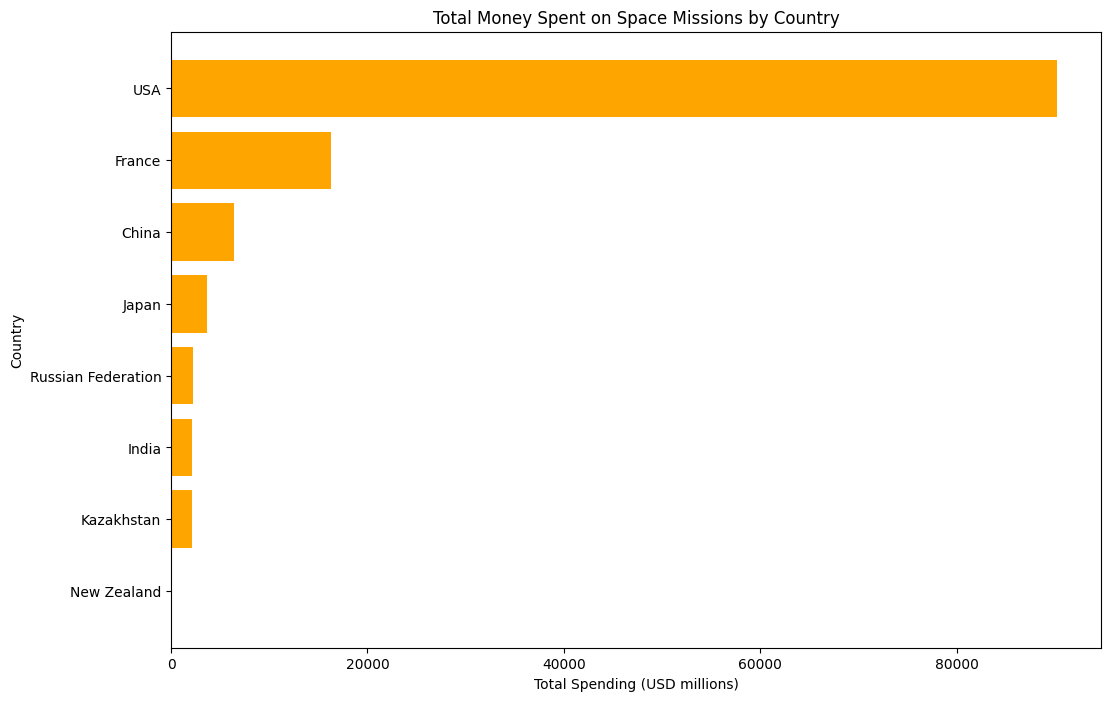

In [38]:
import matplotlib.pyplot as plt

# Price を数値に変換（百万ドル単位）
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# 国ごとの合計金額
country_spending = (
    df.dropna(subset=["Country", "Price"])
      .groupby("Country")["Price"]
      .sum()
      .reset_index()
      .sort_values("Price", ascending=False)
)

# 上位15か国を可視化
top_countries = country_spending.head(15)

plt.figure(figsize=(12,8))
plt.barh(top_countries["Country"], top_countries["Price"], color="orange")
plt.xlabel("Total Spending (USD millions)")
plt.ylabel("Country")
plt.title("Total Money Spent on Space Missions by Country")
plt.gca().invert_yaxis()  # 上位を上に表示
plt.show()


# Analyse the Amount of Money Spent by Organisation per Launch

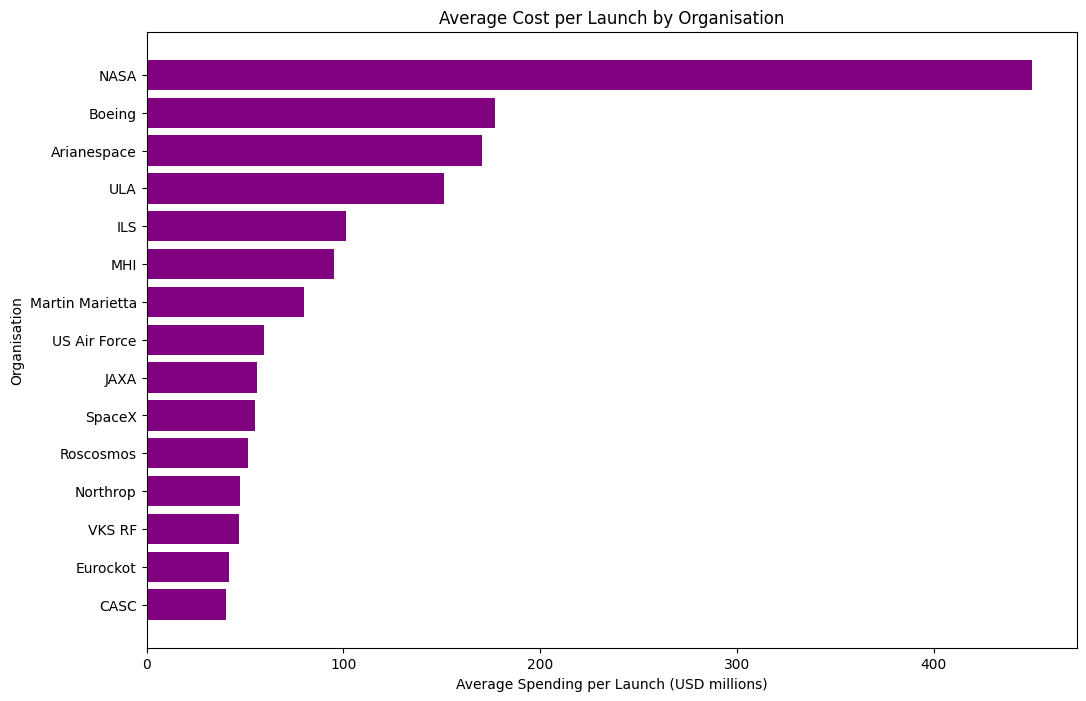

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Priceを数値に変換（百万ドル単位）
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Organisationごとに Launch数と平均コストを計算
org_cost_per_launch = (
    df.groupby("Organisation")
      .agg(
          launches=("Price", "count"),      # 打ち上げ数（Price欠損除外）
          total_spending=("Price", "sum")   # 合計費用
      )
      .assign(avg_cost=lambda x: x["total_spending"] / x["launches"])  # 平均コスト
      .reset_index()
      .sort_values("avg_cost", ascending=False)
)

# 上位15組織を可視化
top_orgs = org_cost_per_launch.head(15)

plt.figure(figsize=(12,8))
plt.barh(top_orgs["Organisation"], top_orgs["avg_cost"], color="purple")
plt.xlabel("Average Spending per Launch (USD millions)")
plt.ylabel("Organisation")
plt.title("Average Cost per Launch by Organisation")
plt.gca().invert_yaxis()
plt.show()


# Chart the Number of Launches per Year

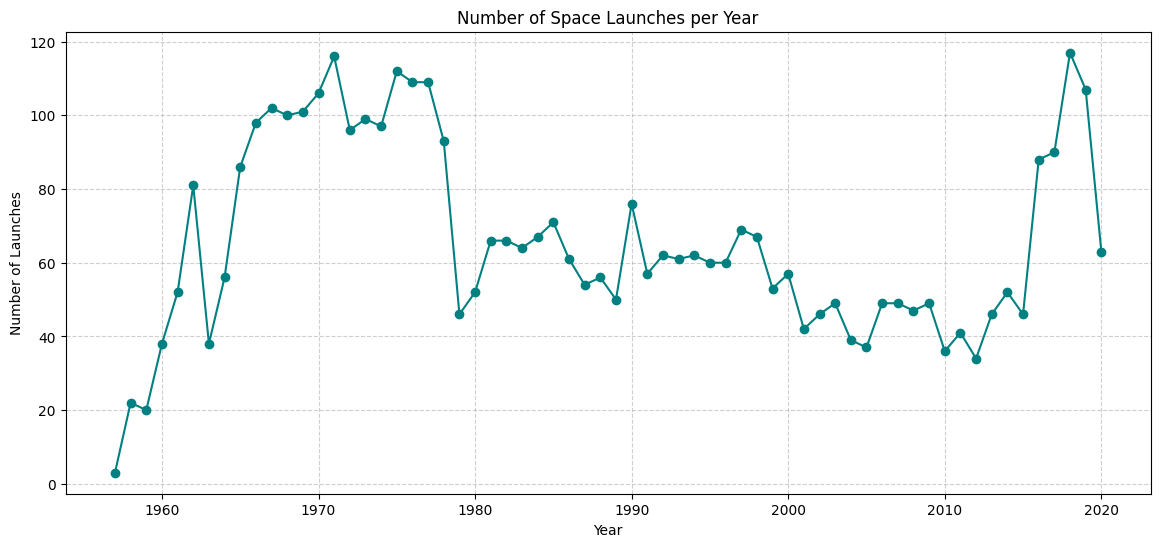

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 日付をdatetimeに変換
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 年ごとの打ち上げ回数
launches_per_year = df.groupby(df["Date"].dt.year).size()

plt.figure(figsize=(14,6))
plt.plot(launches_per_year.index, launches_per_year.values, marker="o", color="teal")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Space Launches per Year")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [41]:
print(df["Date"].max())　　#until Aug

2020-08-07 05:12:00+00:00


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

Most launches in a single year-month: 1968-04 with 16 launches.
Calendar month with most launches overall: December (#12) with 430 total launches across all years.


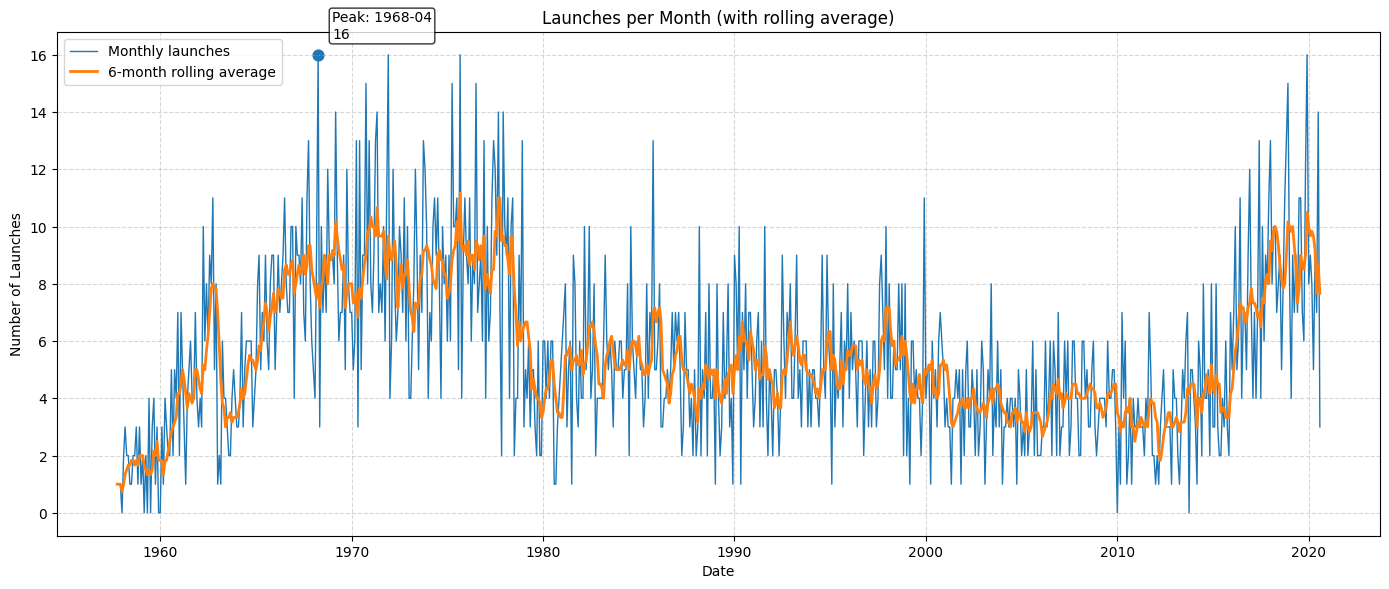

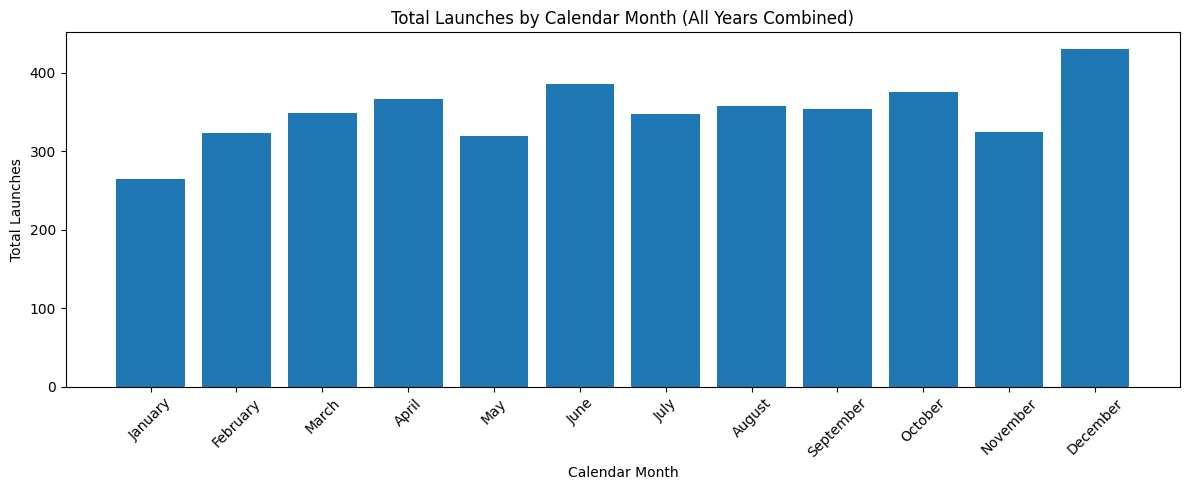

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 0) 日付をDatetime化
# =========================
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df_m = df.dropna(subset=["Date"]).copy()

# =========================
# 1) 月次に集計（Year-Monthごとの件数）
# =========================
monthly = (
    df_m.set_index("Date")
        .resample("MS")     # Month Startで揃える
        .size()
        .rename("launches")
)
# 念のため昇順
monthly = monthly.sort_index()

# =========================
# 2) ローリング平均（窓幅はお好みで）
# =========================
WINDOW = 6   # 例：6ヶ月。年次の季節性なら12でもOK
monthly_roll = monthly.rolling(window=WINDOW, min_periods=1).mean()

# =========================
# 3) ピーク算出
#    a) 歴代で最も多かった「特定の年月」
#    b) カレンダー月（1〜12）の合計で最も多い“月”
# =========================
peak_ym = monthly.idxmax()                 # Timestamp（例：1984-12-01）
peak_ym_count = int(monthly.max())

# Seriesのまま index.month でグループ化（DatetimeIndexが前提）
month_totals = monthly.groupby(monthly.index.month).sum()
peak_month_num = int(month_totals.idxmax())
peak_month_total = int(month_totals.max())

month_name_map = {
    1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",
    7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"
}
peak_month_name = month_name_map[peak_month_num]

print(f"Most launches in a single year-month: {peak_ym.strftime('%Y-%m')} with {peak_ym_count} launches.")
print(f"Calendar month with most launches overall: {peak_month_name} (#{peak_month_num}) with {peak_month_total} total launches across all years.")

# =========================
# 4) 可視化①：月次推移 + ローリング平均
# =========================
plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly.values, label="Monthly launches", linewidth=1)
plt.plot(monthly_roll.index, monthly_roll.values, label=f"{WINDOW}-month rolling average", linewidth=2)

# ピーク月にマーカー＆注釈
plt.scatter([peak_ym], [peak_ym_count], s=60)
plt.annotate(f"Peak: {peak_ym.strftime('%Y-%m')}\n{peak_ym_count}",
             xy=(peak_ym, peak_ym_count),
             xytext=(10, 12),
             textcoords="offset points",
             bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8))

plt.title("Launches per Month (with rolling average)")
plt.xlabel("Date")
plt.ylabel("Number of Launches")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# =========================
# 5) 可視化②：カレンダー月ごとの累計（1〜12月）
# =========================
month_order = range(1,13)
totals_in_order = [int(month_totals.get(m, 0)) for m in month_order]
labels_in_order = [month_name_map[m] for m in month_order]

plt.figure(figsize=(12,5))
plt.bar(labels_in_order, totals_in_order)
plt.title("Total Launches by Calendar Month (All Years Combined)")
plt.xlabel("Calendar Month")
plt.ylabel("Total Launches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

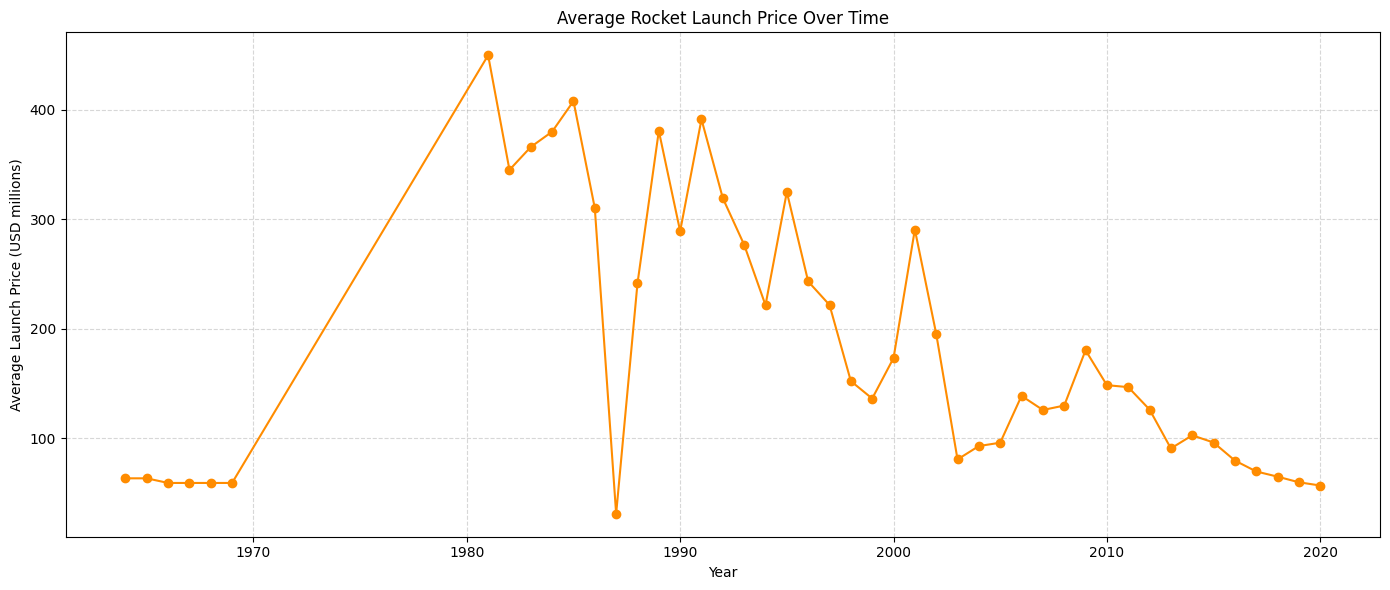

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Price を数値に変換（百万ドル単位）
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Date を datetime に変換
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 年ごとの平均打ち上げ価格
avg_price_per_year = (
    df.dropna(subset=["Date", "Price"])
      .groupby(df["Date"].dt.year)["Price"]
      .mean()
)

# 可視化
plt.figure(figsize=(14,6))
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker="o", color="darkorange")
plt.xlabel("Year")
plt.ylabel("Average Launch Price (USD millions)")
plt.title("Average Rocket Launch Price Over Time")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


1991 cold war finished


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

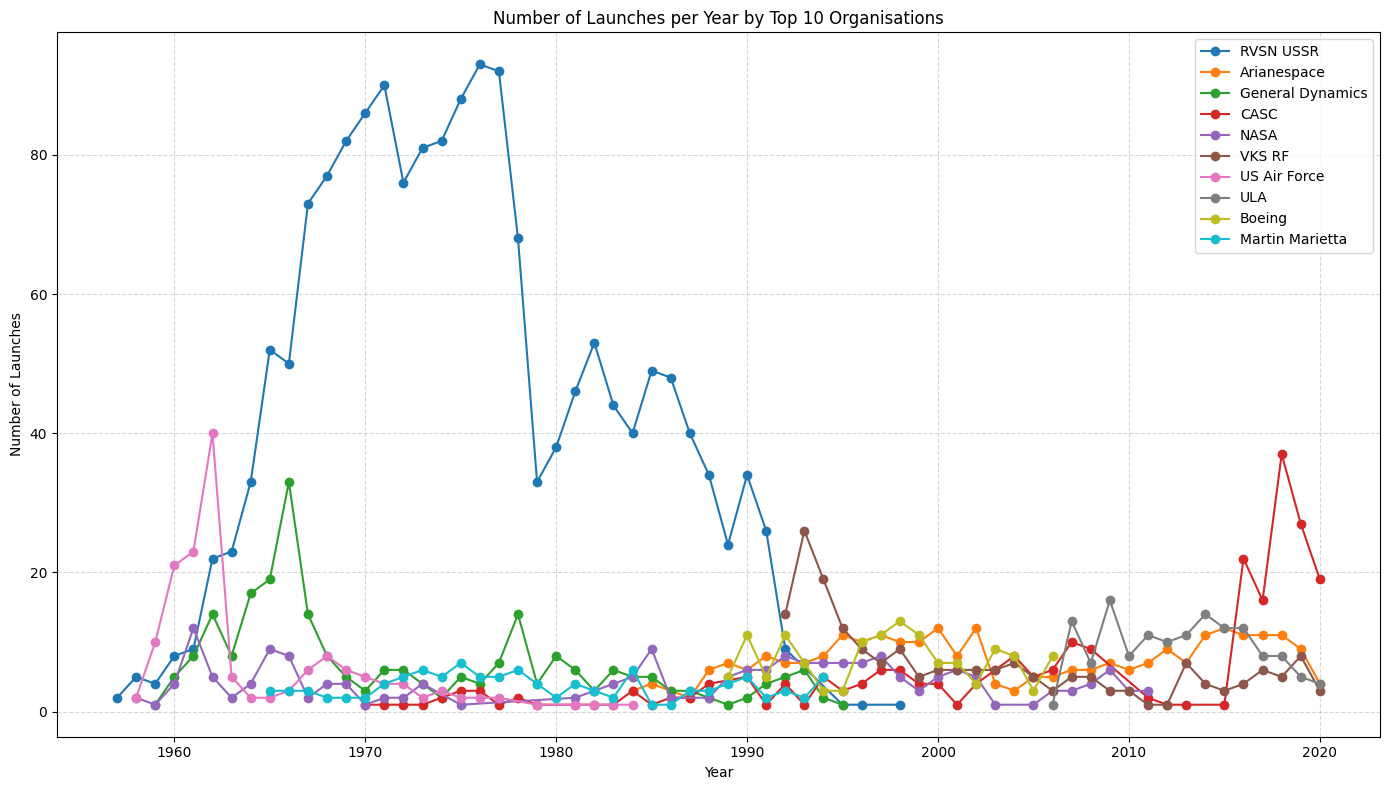

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 日付をdatetime化
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# Organisationごとの総打ち上げ数を集計
org_total = df.groupby("Organisation").size().sort_values(ascending=False)

# トップ10組織
top10_orgs = org_total.head(10).index

# 年ごと・組織ごとの件数
yearly_orgs = (
    df[df["Organisation"].isin(top10_orgs)]
      .groupby(["Year", "Organisation"])
      .size()
      .reset_index(name="launches")
)

# 可視化
plt.figure(figsize=(14,8))
for org in top10_orgs:
    data = yearly_orgs[yearly_orgs["Organisation"] == org]
    plt.plot(data["Year"], data["launches"], marker="o", label=org)

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Number of Launches per Year by Top 10 Organisations")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

['USA' 'China' 'Kazakhstan' 'Japan' 'Israel' 'New Zealand'
 'Russian Federation' 'Iran' 'France' 'India' 'North Korea'
 'Pacific Ocean' 'South Korea' 'Brazil' 'Kenya' 'Australia']


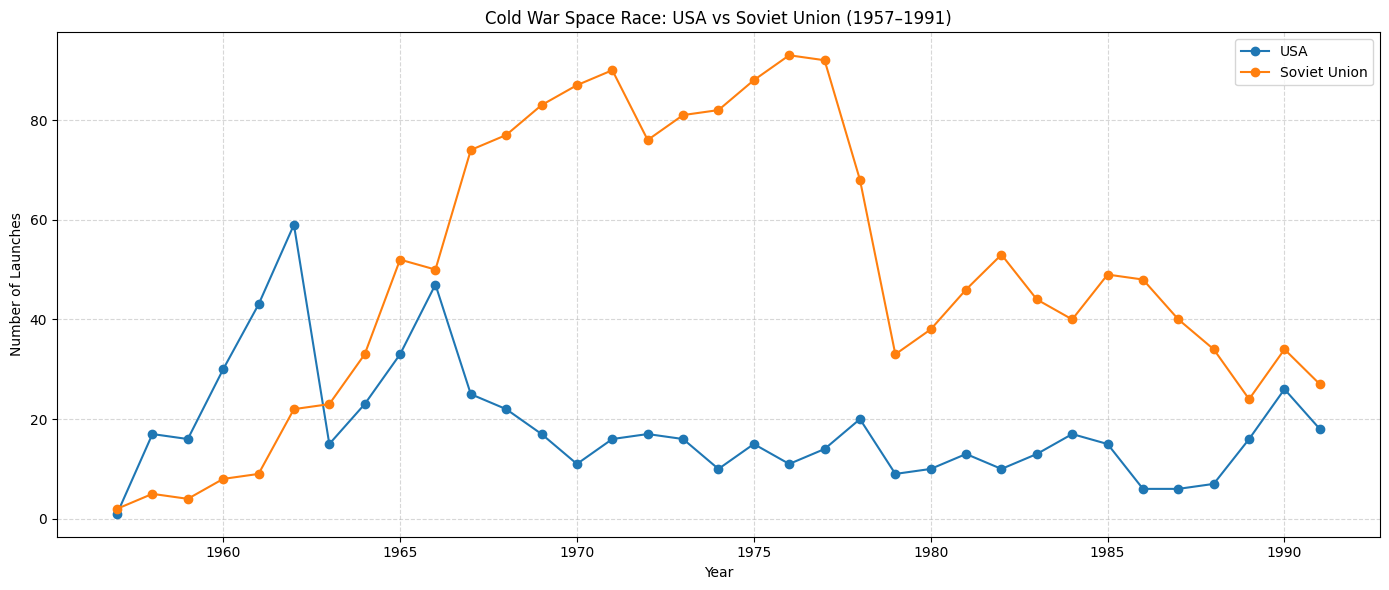

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateをdatetime化
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# 冷戦期間に絞る
cold_war = df[(df["Year"] >= 1957) & (df["Year"] <= 1991)].copy()

# Country表記を確認
print(df["Country"].unique())

# ソ連系をまとめる（例: Russian Federation, Kazakhstan をソ連扱い）
cold_war["Country_clean"] = cold_war["Country"].replace({
    "Russian Federation": "Soviet Union",
    "Kazakhstan": "Soviet Union"
})

# USAとソ連のみ残す
cw_filtered = cold_war[cold_war["Country_clean"].isin(["USA", "Soviet Union"])]

# 年ごと・国ごとの件数
cw_yearly = (
    cw_filtered.groupby(["Year", "Country_clean"])
               .size()
               .reset_index(name="launches")
)

# 可視化
plt.figure(figsize=(14,6))
for country in ["USA", "Soviet Union"]:
    data = cw_yearly[cw_yearly["Country_clean"] == country]
    plt.plot(data["Year"], data["launches"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.title("Cold War Space Race: USA vs Soviet Union (1957–1991)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [51]:
import pandas as pd
import plotly.express as px

# Dateをdatetime化
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# 冷戦時代に限定（1957-1991）
cold_war = df[(df["Year"] >= 1957) & (df["Year"] <= 1991)].copy()

# USSRに含める国を統一
cold_war["Country_clean"] = cold_war["Country"].replace({
    "Russian Federation": "Soviet Union",
    "Kazakhstan": "Soviet Union"
})

# USA vs Soviet Union の件数集計
cw_counts = (
    cold_war[cold_war["Country_clean"].isin(["USA", "Soviet Union"])]
    .groupby("Country_clean")
    .size()
    .reset_index(name="launches")
)

# 円グラフ
fig = px.pie(
    cw_counts,
    names="Country_clean",
    values="launches",
    title="Total Launches during the Cold War: USA vs Soviet Union",
    hole=0.3
)
fig.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

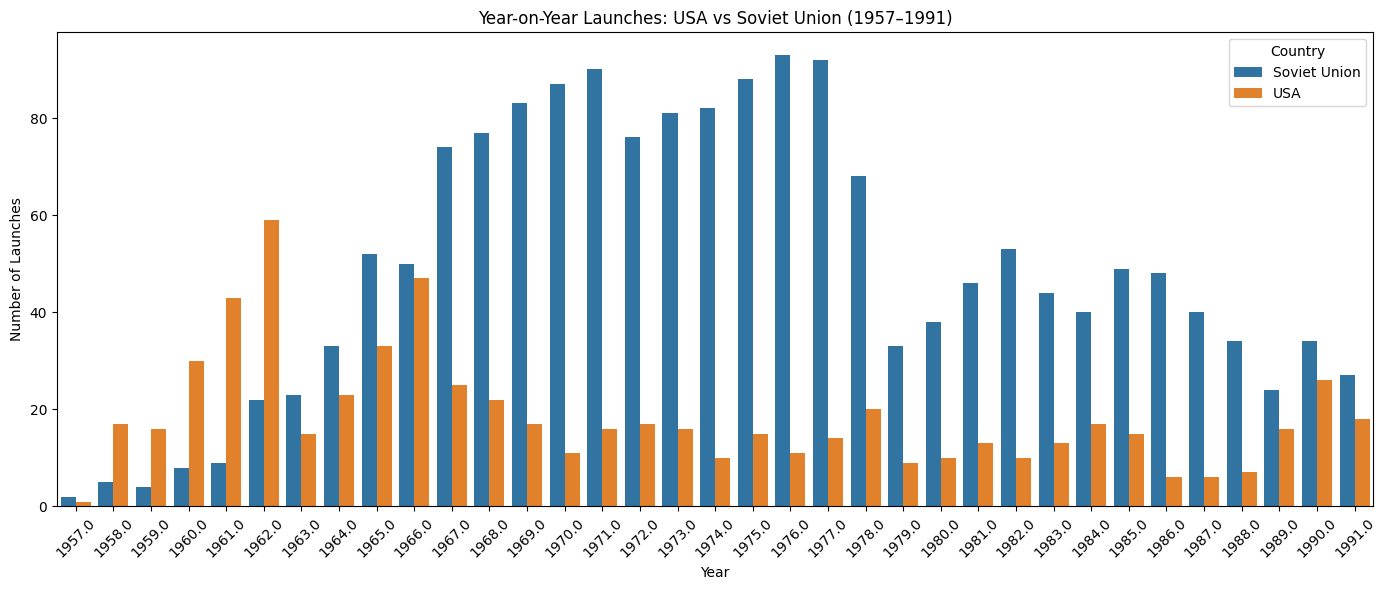

In [52]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.barplot(data=cw_yearly, x="Year", y="launches", hue="Country_clean")
plt.title("Year-on-Year Launches: USA vs Soviet Union (1957–1991)")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

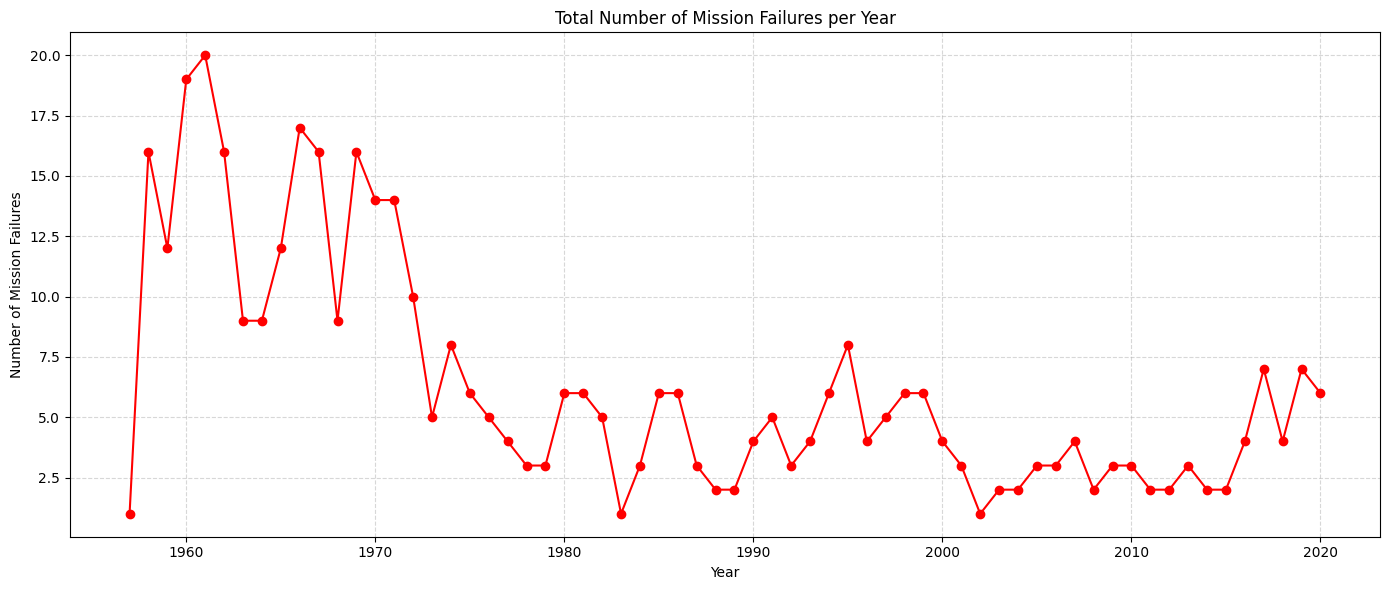

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateをdatetime化
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# MissionStatusのユニーク値をチェック（必要ならコメントアウト外して確認）
# print(df["MissionStatus"].unique())

# 失敗に含めるステータスを定義
failure_status = ["Failure", "Partial Failure", "Prelaunch Failure"]

# 失敗のみフィルタ
failures = df[df["Mission_Status"].isin(failure_status)]

# 年ごとの失敗件数
failures_per_year = failures.groupby("Year").size()

# 可視化
plt.figure(figsize=(14,6))
plt.plot(failures_per_year.index, failures_per_year.values, marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Mission Failures")
plt.title("Total Number of Mission Failures per Year")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

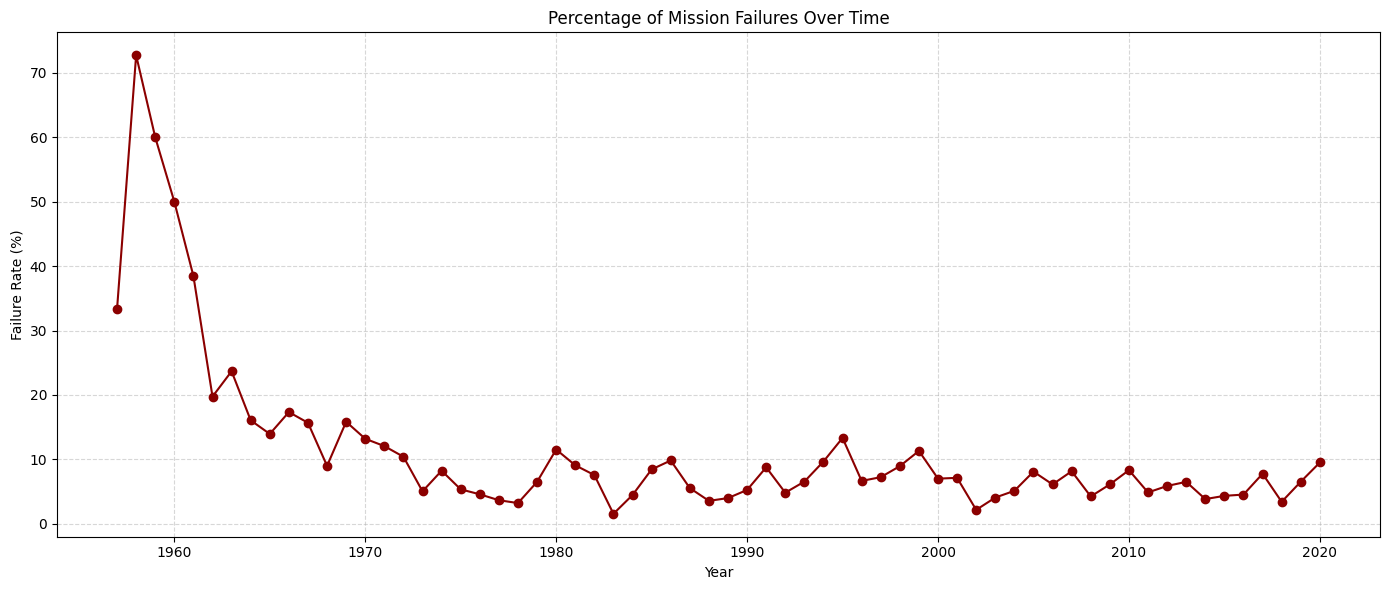

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 年ごとの総打ち上げ数
total_per_year = df.groupby("Year").size()

# 年ごとの失敗打ち上げ数
failure_status = ["Failure", "Partial Failure", "Prelaunch Failure"]
failures_per_year = df[df["Mission_Status"].isin(failure_status)].groupby("Year").size()

# データをまとめて割合計算
failure_rate = (failures_per_year / total_per_year * 100).fillna(0)

# 可視化
plt.figure(figsize=(14,6))
plt.plot(failure_rate.index, failure_rate.values, marker="o", color="darkred")
plt.xlabel("Year")
plt.ylabel("Failure Rate (%)")
plt.title("Percentage of Mission Failures Over Time")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

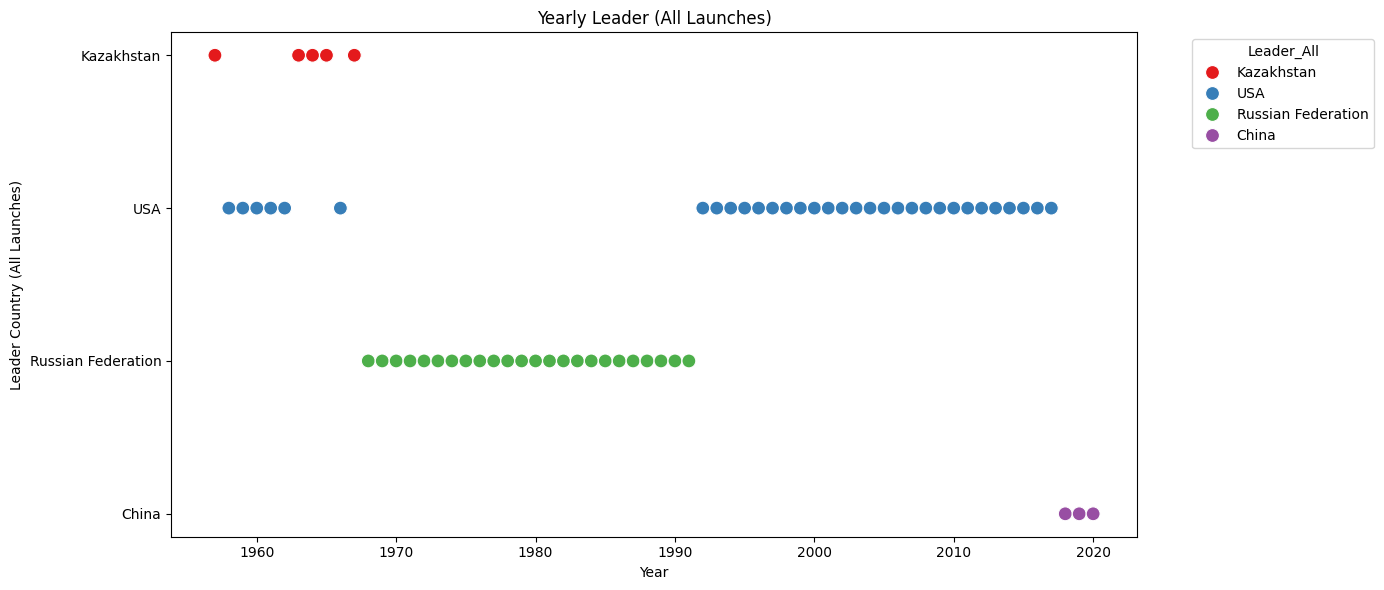

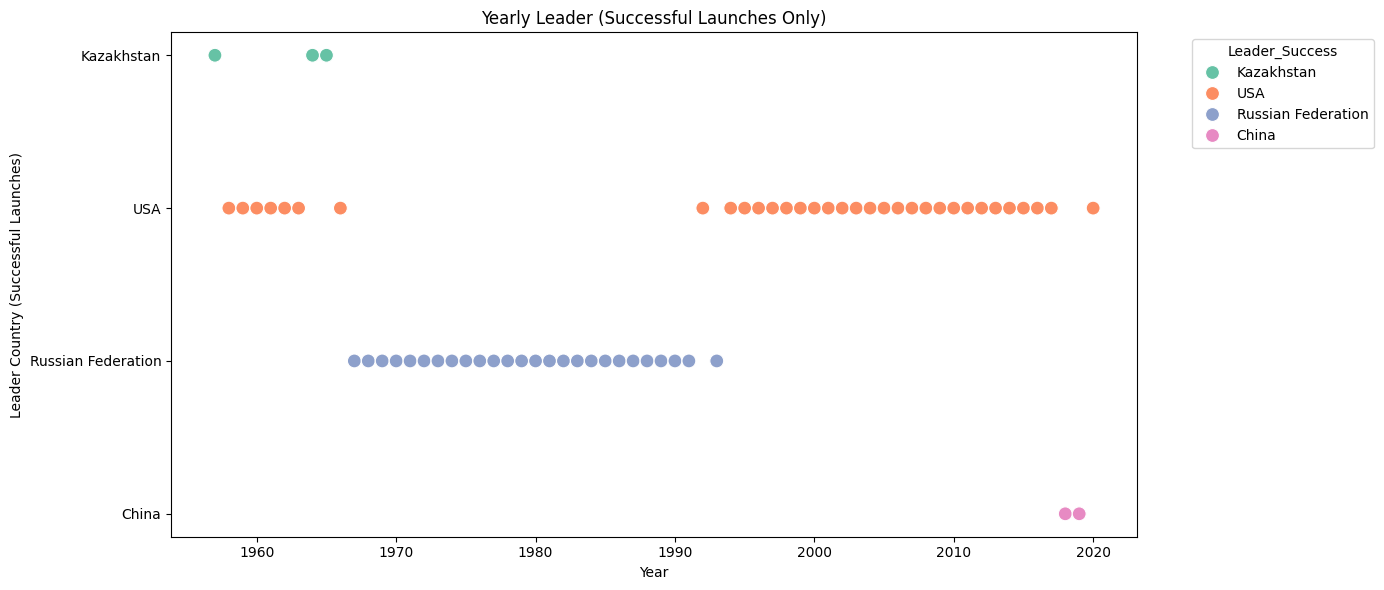

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# leaders データフレームに「Leader_All」「Leader_Success」が入っている前提

plt.figure(figsize=(14,6))
sns.scatterplot(data=leaders, x="Year", y="Leader_All", hue="Leader_All", s=100, palette="Set1")
plt.title("Yearly Leader (All Launches)")
plt.xlabel("Year")
plt.ylabel("Leader Country (All Launches)")
plt.legend(title="Leader_All", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
sns.scatterplot(data=leaders, x="Year", y="Leader_Success", hue="Leader_Success", s=100, palette="Set2")
plt.title("Yearly Leader (Successful Launches Only)")
plt.xlabel("Year")
plt.ylabel("Leader Country (Successful Launches)")
plt.legend(title="Leader_Success", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

/tmp/ipython-input-1240589770.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1240589770.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



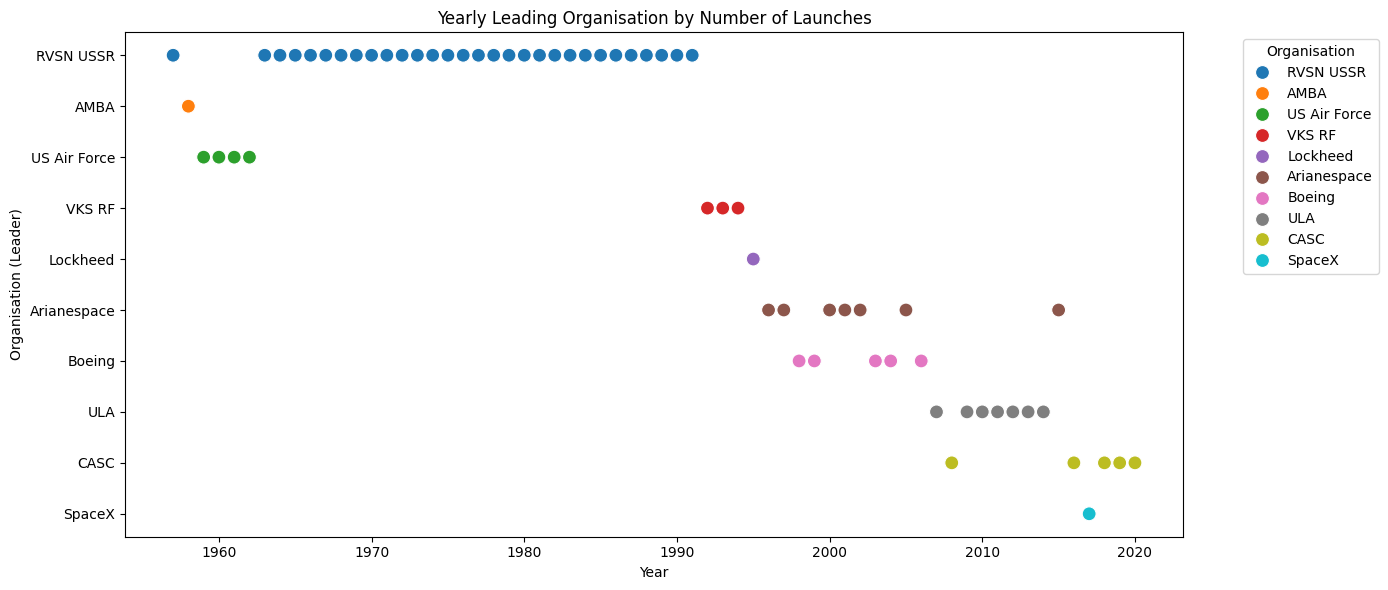

1970s–1980s Dominant Organisations:
Organisation
RVSN USSR    20
Name: count, dtype: int64
2018–2020 Leaders:
    Year Organisation
61  2018         CASC
62  2019         CASC
63  2020         CASC


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日付をdatetimeに変換
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# 年×組織の打ち上げ数
org_yearly = (
    df.groupby(["Year", "Organisation"])
      .size()
      .reset_index(name="launches")
)

# 年ごとに最大打ち上げの組織を抽出
leaders_org = org_yearly.loc[
    org_yearly.groupby("Year")["launches"].idxmax()
].reset_index(drop=True)

# 可視化（年ごとに色分け）
plt.figure(figsize=(14,6))
sns.scatterplot(
    data=leaders_org,
    x="Year",
    y="Organisation",
    hue="Organisation",
    s=100,
    palette="tab10"
)
plt.title("Yearly Leading Organisation by Number of Launches")
plt.xlabel("Year")
plt.ylabel("Organisation (Leader)")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 1970〜80年代のリーダー
leaders_70s_80s = leaders_org[(leaders_org["Year"] >= 1970) & (leaders_org["Year"] <= 1989)]
print("1970s–1980s Dominant Organisations:")
print(leaders_70s_80s["Organisation"].value_counts())

# 2018–2020のリーダー
leaders_2018_2020 = leaders_org[leaders_org["Year"].isin([2018, 2019, 2020])]
print("2018–2020 Leaders:")
print(leaders_2018_2020[["Year", "Organisation"]])
